In [2]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv("videogamessales.csv")

# Columns:
Rank – Position in sales ranking
Name – Game title
Platform – Console/PC system
Year – Release year
Genre – Type of game (Action, RPG, etc.)
Publisher – Company that released the game
NA_Sales – North America sales (in millions)
EU_Sales – Europe sales (in millions)
JP_Sales – Japan sales (in millions)
Other_Sales – Sales in other regions (in millions)
Global_Sales – Total worldwide sales (in millions)

In [127]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [128]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [129]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [131]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [132]:
df.duplicated().sum()

0

In [133]:
df.select_dtypes(include='number').corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [134]:
missing_data = df.isnull().sum().to_frame('Missing Count')
missing_data['Missing [%]'] = (missing_data['Missing Count'] / len(df)) * 100
missing_data

,Missing Count,Missing [%]
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Year,271,1.632727
Genre,0,0.000000
Publisher,58,0.349440
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


In [135]:
df.shape

(16598, 11)

In [136]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [137]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [138]:
df['Platform'].nunique(), df['Genre'].nunique(), df['Publisher'].nunique()

(31, 12, 578)

In [139]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [140]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [141]:
df['Publisher'].value_counts().head(20)

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64

In [142]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# data cleaning


In [143]:
df['Year'] = df['Year'].fillna(0)
df['Publisher'] = df['Publisher'].fillna('No_information')
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [144]:
checking0=(df['Year']==0).sum()
print(checking0)
checkingNo_information=df['Publisher'].value_counts().get('No_information', 0)
print(checkingNo_information)

271
58


In [145]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10175,10177,The Smurfs 2,PS3,2013.0,Platform,Ubisoft,0.02,0.07,0.00,0.02,0.11
13941,13943,Real Soccer 2008,DS,2007.0,Sports,Ubisoft,0.03,0.00,0.00,0.00,0.04
4366,4368,Eternal Sonata,PS3,2008.0,Role-Playing,Atari,0.19,0.13,0.07,0.06,0.45
16203,16206,Shin Hayarigami 2,PSV,2016.0,Adventure,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01
435,436,Animal Crossing,GC,2001.0,Simulation,Nintendo,1.92,0.16,0.99,0.09,3.15


# Most Popular Genre 

In [146]:
popular_genre=df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(popular_genre)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


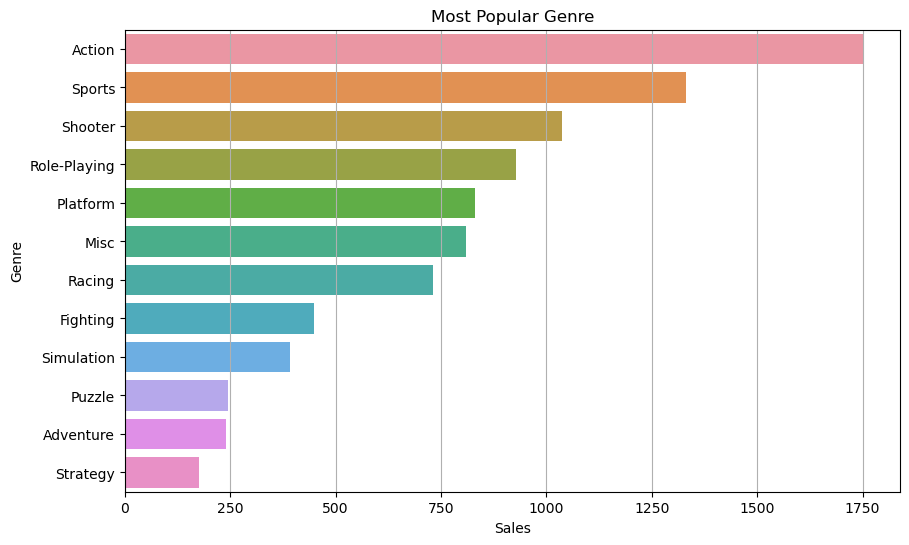

In [154]:
plt.figure(figsize=(10,6))
sbn.barplot(x=popular_genre.values , y=popular_genre.index , data=df)
plt.title("Most Popular Genre")       
plt.xlabel("Sales")
plt.ylabel("Genre")
plt.grid(axis="x")
plt.show()

# Most sales by Platform 

In [149]:
platform_sales=df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

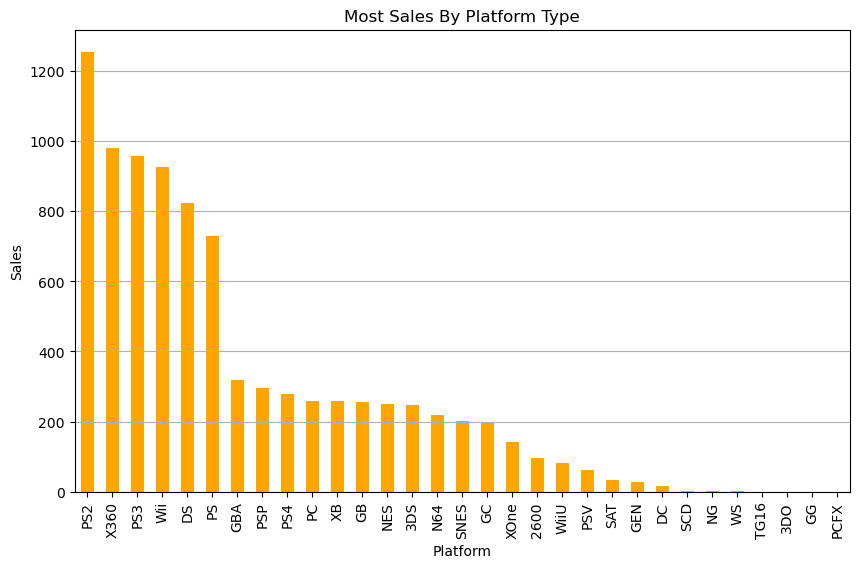

In [151]:
plt.figure(figsize=(10,6))
platform_sales.plot(kind="bar" , color ="orange")
plt.title("Most Sales By Platform Type")       
plt.xlabel("Platform")
plt.ylabel("Sales")
plt.grid(axis="y")
plt.show()

In [160]:
df.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Most sales by Publisher

In [161]:
df["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Glams                              1
Locus                              1
Warp                               1
Elite                              1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64

In [163]:
popular_publishers=df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

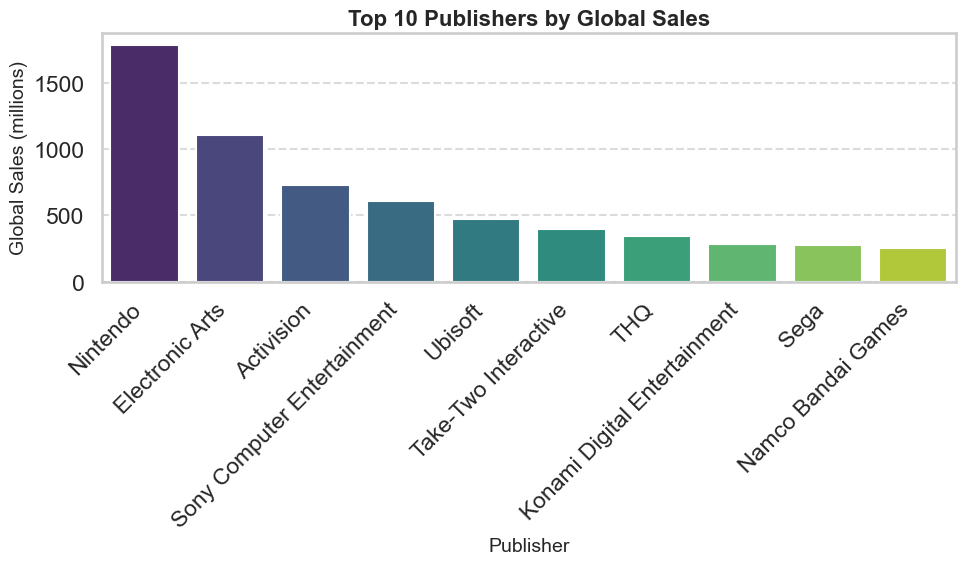

In [168]:
plt.figure(figsize=(10,6))
sbn.barplot(x=popular_publishers.index, y=popular_publishers.values, palette='viridis')
plt.title('Top 10 Publishers by Global Sales', fontsize=16, fontweight='bold')
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Global Sales (millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Number of games released in Years

In [155]:
print(f"The Year ranges from {df[df['Year'] > 1950]['Year'].min()} to {df['Year'].max()}.")

The Year ranges from 1980.0 to 2020.0.


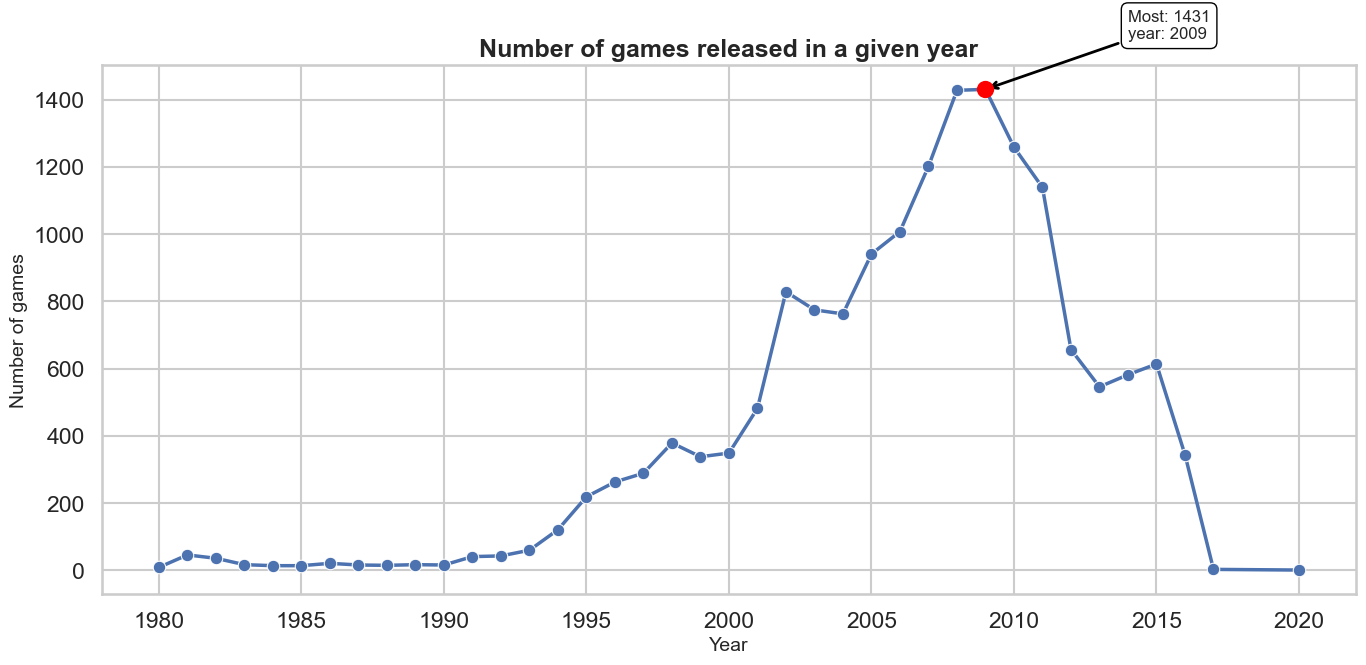

In [159]:
sbn.set(style='whitegrid', context='talk', palette='deep')

df['Year'] = df['Year'].astype(int)

df_clean = df[df['Year'] > 1950].copy()
df_clean['Year'] = df_clean['Year']

games_per_year = df_clean['Year'].value_counts().sort_index().reset_index()
games_per_year.columns = ['Year', 'Count']

max_row = games_per_year.loc[games_per_year['Count'].idxmax()]
max_year = max_row['Year']
max_value = max_row['Count']


plt.figure(figsize=(14, 7))
lineplot = sbn.lineplot(data=games_per_year, x='Year', y='Count', linewidth=2.5, marker='o')
plt.title('Number of games released in a given year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of games', fontsize=14)


plt.scatter(max_year, max_value, color='red', s=120, zorder=5)


plt.annotate(
    f'Most: {int(max_value)}\nyear: {int(max_year)}',
    xy=(max_year, max_value),
    xytext=(max_year + 5, max_value + 150),
    arrowprops=dict(arrowstyle='->', color='black', lw=2),
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='black', lw=1)
)

plt.tight_layout()
plt.show()

# Total sales of video games by region

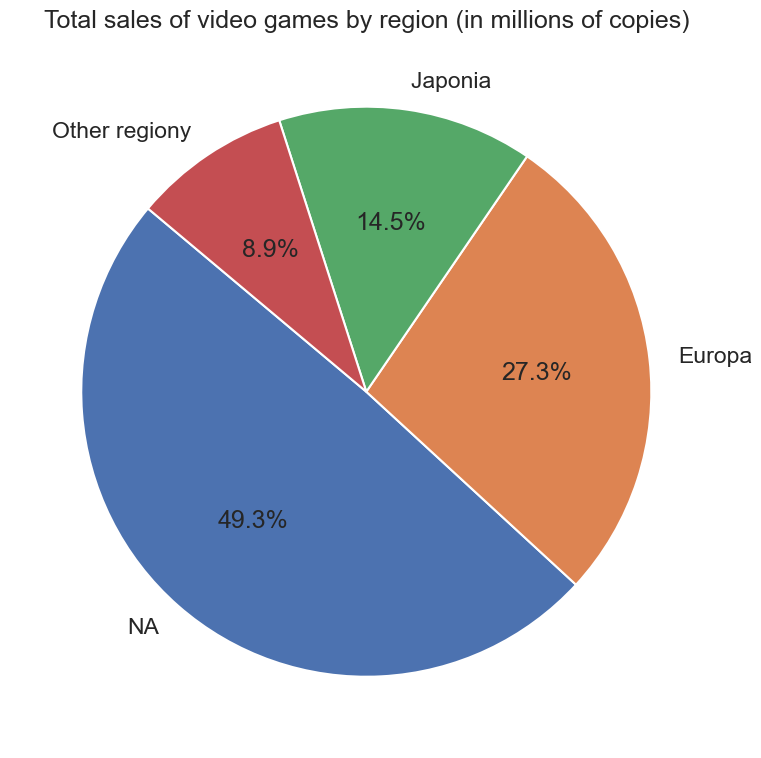

In [176]:
regional_sales = {
    'NA': df['NA_Sales'].sum(),
    'Europa': df['EU_Sales'].sum(),
    'Japonia ': df['JP_Sales'].sum(),
    'Other regiony': df['Other_Sales'].sum()
}
plt.figure(figsize=(8, 8))
plt.pie(regional_sales.values(), 
        labels=regional_sales.keys(),  
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Total sales of video games by region (in millions of copies)')

plt.tight_layout()
plt.show()